In [8]:
#IMPORTS
%run Functions.ipynb
%run ../datuslib.ipynb
import pandas as pd
import string
import numpy as np
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time
import category_encoders as ce
import re
import nltk
from nltk.corpus import stopwords

from transformers import pipeline
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 

pd.set_option('display.max_columns', None)

In [9]:
#CARGA DATA
#train = pd.read_csv("../Data/train.csv")
#to_predict = pd.read_csv("../Data/test.csv")
train = pd.read_csv("train_features_.csv")
to_predict = pd.read_csv("test_features_.csv")


#normalizo negatividad
train["negativity"]= train["negativity"] / train["negativity"].max()
to_predict["negativity"]= to_predict["negativity"] / to_predict["negativity"].max()


train["len"]= train["len"] / 280
to_predict["len"]= to_predict["len"] / 280


#train["unique_word_count"]= train["unique_word_count"] / train["word_count"]
#to_predict["unique_word_count"]= to_predict["unique_word_count"] / to_predict["word_count"]

In [10]:
#FEATURES
#features(train, to_predict)

#binary(train, to_predict)

In [11]:
#LIMPIO un poco
#remove(train, to_predict)

#N-PALABRA_
#y, n = asd(train)
#n_grams(y,train,to_predict, 1)

#n_grams(n,train,to_predict, 0)

In [12]:
#NEGATIIDAD Y SENTIMIENTO

#sentimiento = pd.read_csv("sentimiento_train.csv")
#train["sentimiento"] = sentimiento["sentimiento"] 

#negativity = pd.read_csv("negativity_train_1.csv")
#train["negativity"] = negativity["negativity"] 

#sentimiento = pd.read_csv("sentimiento_test.csv")
#to_predict["sentimiento"] = sentimiento["sentimiento"] 

#negativity = pd.read_csv("negativity_test_1.csv")
#to_predict["negativity"] = negativity["negativity"] 

In [13]:
#GUARDO

#train.to_csv('train_features_.csv', index=False)
#to_predict.to_csv('test_features_.csv', index=False)


In [14]:
uno = train[train["target"]==1]
pr = False
for linea in uno["text"]:
    if (str(linea) == "towboat trek sympathy deluge falls vtc"):
        pr =True
    if (pr == True):
        print(linea)

towboat trek sympathy deluge falls vtc
back beach after deluge surf camp in motion our surf therapy programme kicked off today
perhaps historic should applied not deluge recently exposed childsexabuse but truly historic scale coverup
youre in search powerful content improve your business been frustrated with deluge quantit  
im uk there isnt deluge canadian themed tops aroundthe timing perfect cant quite believe mad
glimpses hyderabad deluged by heavy rainfall
are you deluged with low selfimage take quiz
tarp protecting outfield and cannot moved infield getting deluged
eu states squabble over immigration ukfrance eurotunnel deluged with migrants one dead thousands storm tunnel
businesses are deluged with invoices make yours stand out with colour shape and its likely rise top t e pay pileq
news alerts glimpses hyderabad deluged by heavy rainfall
theyve come back gtgt flying ant day capital deluged by annual swarm winged insects
rand pauls debate strategy demolish bad ideas out there poi

wreckage conclusively confirmed from malaysia pm
related news plane wreckage found part missing malaysia prime ministersays world buzzfeed
malaysian prime minister says reunion island wreckage from via slate
wreckage conclusively confirmed from malaysia pm investigators and families those
first piece wreckage from firstever lost boeing which vanished back in early march along with people board
wreckage conclusively confirmed from malaysia pm investigators and families those
science now piece wreckage from flight been confirmed r  union island possible t
wreckage conclusively confirmed from malaysia pm investigators and families those
wreckage conclusively confirmed from malaysia pm investigators and families those
wreckage najib najibrazak malaysiaairlines
check out malaysia confirms plane wreckage from flight
science now piece wreckage from flight been confirmed r  union island possible t
wreckage conclusively confirmed from malaysia pm
wreckage conclusively confirmed from malaysia pm

In [15]:
train.drop(columns=['1-gram-1', '1-gram-0'], axis=1,inplace = True)
to_predict.drop(columns=['1-gram-1','1-gram-0'], axis=1,inplace = True)

In [16]:
listaPalabras = []
archivo = open("NW.txt", "r")
for linea in archivo.readlines():
    listaPalabras.append(linea)
archivo.close()


def listaPalabrasDicFrec(listaPalabras):
    archivo = open("NW.txt", "r")
    frecuenciaPalab = [listaPalabras.count(p) for p in listaPalabras]
    return dict(list(zip(listaPalabras,frecuenciaPalab)))

def ordenaDicFrec(dicfrec):
    aux = [(dicfrec[key], key) for key in dicfrec]
    aux.sort()
    aux.reverse()
    return aux

diccionario = listaPalabrasDicFrec(listaPalabras)
diccOrdenado = ordenaDicFrec(diccionario)

for s in diccOrdenado:
    print(str(s))

(1, 'wreck\n')
(1, 'wildfires\n')
(1, 'wildfire\n')
(1, 'wbioterrorismampuse\n')
(1, 'warning\n')
(1, 'warfighting\n')
(1, 'war\n')
(1, 'volcanic\n')
(1, 'victims\n')
(1, 'victim\n')
(1, 'vandalized\n')
(1, 'urgent\n')
(1, 'typhoon\n')
(1, 'truckcrash\n')
(1, 'tragedy\n')
(1, 'tornado\n')
(1, 'thunderstorms\n')
(1, 'thunderstorm\n')
(1, 'terrorist\n')
(1, 'terrifying\n')
(1, 'survive\n')
(1, 'struggling\n')
(1, 'storm\n')
(1, 'stealing\n')
(1, 'spill\n')
(1, 'shouting\n')
(1, 'shotgun\n')
(1, 'shooting\n')
(1, 'screaming\n')
(1, 'salvation\n')
(1, 'rape\n')
(1, 'radioactive\n')
(1, 'propertycasualty\n')
(1, 'plague\n')
(1, 'panics\n')
(1, 'nuclear\n')
(1, 'multicasualty\n')
(1, 'missing\n')
(1, 'lifethreatening\n')
(1, 'landslide\n')
(1, 'kills\n')
(1, 'killing\n')
(1, 'killed\n')
(1, 'kidnap\n')
(1, 'invading\n')
(1, 'invadedbombed\n')
(1, 'invaded\n')
(1, 'injury\n')
(1, 'injuries\n')
(1, 'injured\n')
(1, 'incident\n')
(1, 'imprisoning\n')
(1, 'illness\n')
(1, 'hurricane\n')
(1, 'hos

In [17]:
has_words(train, to_predict)

#train["unique_word_count"] = train["unique_word_count"]/train["unique_word_count"]
#to_predict["unique_word_count"] = to_predict["unique_word_count"]/to_predict["unique_word_count"]

In [18]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'len', 'word_count',
       'unique_word_count', 'url_count', 'mean_word_length',
       ...
       'Tiene_gun', 'Tiene_illness', 'Tiene_epidemic', 'Tiene_deaths',
       'Tiene_climate', 'Tiene_plague', 'Tiene_disappearance', 'Tiene_missing',
       'Tiene_floods', 'Tiene_delug'],
      dtype='object', length=207)

In [19]:
to_predict

,id,keyword,location,text,len,word_count,unique_word_count,url_count,mean_word_length,hashtag_count,mention_count,Kindex,key_bit0,key_bit1,key_bit2,key_bit3,key_bit4,key_bit5,key_bit6,key_bit7,2-gram-1,3-gram-1,2-gram-0,3-gram-0,sentimiento,negativity,Tiene_earthquake,Tiene_forest,Tiene_fire,Tiene_wildfires,Tiene_flooding,Tiene_emergency,Tiene_afraid,Tiene_tornado,Tiene_died,Tiene_flooded,Tiene_flood,Tiene_crash,Tiene_ablaze,Tiene_burned,Tiene_vandalized,Tiene_accidentwho,Tiene_horrible,Tiene_truckcrash,Tiene_dies,Tiene_injury,Tiene_explosion,Tiene_die,Tiene_ambulance,Tiene_ambulances,Tiene_annihilated,Tiene_annihilate,Tiene_annihilation,Tiene_annihilating,Tiene_dieplease,Tiene_apocalypse,Tiene_survive,Tiene_armageddon,Tiene_warning,Tiene_salvation,Tiene_attack,Tiene_struggling,Tiene_burglary,Tiene_death,Tiene_arson,Tiene_hospital,Tiene_arsonist,Tiene_bombing,Tiene_horrific,Tiene_terrorist,Tiene_injured,Tiene_assailant,Tiene_rape,Tiene_condemn,Tiene_bombs,Tiene_gunfight,Tiene_attacked,Tiene_imprisoning,Tiene_avalanche,Tiene_war,Tiene_battle,Tiene_fight,Tiene_destroyed,Tiene_bioterror,Tiene_wbioterrorismampuse,Tiene_bioterrorism,Tiene_disaster,Tiene_anthrax,Tiene_blaze,Tiene_blazing,Tiene_bleeding,Tiene_fireball,Tiene_tragedy,Tiene_blood,Tiene_bloody,Tiene_panics,Tiene_nuclear,Tiene_bagging,Tiene_bodybagging,Tiene_bags,Tiene_bomb,Tiene_gunman,Tiene_invadedbombed,Tiene_invaded,Tiene_bombed,Tiene_crime,Tiene_bellybombed,Tiene_storm,Tiene_hurricane,Tiene_collapse,Tiene_urgent,Tiene_kills,Tiene_screaming,Tiene_fireman,Tiene_burning,Tiene_wildfire,Tiene_explosions,Tiene_grenades,Tiene_damages,Tiene_arrested,Tiene_damaging,Tiene_destroys,Tiene_victim,Tiene_victims,Tiene_fires,Tiene_funeral,Tiene_flames,Tiene_killing,Tiene_destruction,Tiene_evacuations,Tiene_evacuation,Tiene_brutality,Tiene_warfighting,Tiene_casualties,Tiene_shooting,Tiene_dead,Tiene_casualty,Tiene_derailment,Tiene_propertycasualty,Tiene_critically,Tiene_casualtygray,Tiene_multicasualty,Tiene_catastrophe,Tiene_catastrophic,Tiene_bombings,Tiene_invading,Tiene_destructive,Tiene_volcanic,Tiene_debris,Tiene_radioactive,Tiene_incident,Tiene_collapsed,Tiene_spill,Tiene_kidnap,Tiene_cliff,Tiene_collapses,Tiene_killed,Tiene_fall,Tiene_landslide,Tiene_terrifying,Tiene_blowout,Tiene_crisis,Tiene_collide,Tiene_collided,Tiene_emerg,Tiene_accident,Tiene_shotgun,Tiene_lifethreatening,Tiene_firing,Tiene_crashing,Tiene_collision,Tiene_collisionno,Tiene_collisionunkn,Tiene_injuries,Tiene_burn,Tiene_fatal,Tiene_crush,Tiene_crushed,Tiene_attacks,Tiene_curfew,Tiene_cyclone,Tiene_typhoon,Tiene_devastates,Tiene_crushes,Tiene_damage,Tiene_thunderstorm,Tiene_thunderstorms,Tiene_danger,Tiene_dehydration,Tiene_crashes,Tiene_stealing,Tiene_crashed,Tiene_critical,Tiene_shouting,Tiene_disease,Tiene_wreck,Tiene_gun,Tiene_illness,Tiene_epidemic,Tiene_deaths,Tiene_climate,Tiene_plague,Tiene_disappearance,Tiene_missing,Tiene_floods,Tiene_delug
0,0,NaN,NaN,just happened terrible car crash,0.121429,6,6,False,4.833333,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.006872,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [20]:
#print ("F1 Score: ", f1_score(train["target"], train["Tiene_"],average='micro'))

### Features y Encoder

In [21]:
train.fillna("nothing", inplace= True)
train['keyword'] = train['keyword'].str.replace('%',' ')
train['keyword'] = train['keyword'].str.replace('2','')
train['keyword'] = train['keyword'].str.replace('0','')

In [22]:
keyword_in_text(train)

train.drop(columns=["id"], axis=1,inplace = True)

train.drop(columns=["location"], axis=1,inplace = True)

train.drop(columns=["text"], axis=1,inplace = True)

train["Tiene_key_impor"] = (train["keyword"] == "wreckage") | (train["keyword"] == "debris") | (train["keyword"] == "derailment") 
#| (train["keyword"] == "outbreak") | (train["keyword"] == "oil split")\
#| (train["keyword"] == "typhoon") | (train["keyword"] == "suicide bombing") | (train["keyword"] == "suicide bomber")

train["Tiene_key_no_impor"] = (train["keyword"] == "aftershock")

from sklearn.preprocessing import LabelEncoder

# Categorical boolean mask
#categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into a list
#categorical_cols = train.columns[categorical_feature_mask].tolist()
#categorical_cols

#le = LabelEncoder()

# apply le on categorical feature columns
#train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col))

train.drop(columns=["Kindex"], axis=1,inplace = True)
#train["keyword"] = train["keyword"]/train["keyword"].max()
train.drop(columns=["keyword"], axis=1,inplace = True)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [23]:
to_predict.fillna("nothing", inplace= True)
to_predict['keyword'] = to_predict['keyword'].str.replace('%',' ')
to_predict['keyword'] = to_predict['keyword'].str.replace('2','')
to_predict['keyword'] = to_predict['keyword'].str.replace('0','')

In [24]:
keyword_in_text(to_predict)

ids = to_predict["id"]

to_predict.drop(columns=["id"], axis=1,inplace = True)
to_predict.drop(columns=["location"], axis=1,inplace = True)

to_predict['keyword'] = to_predict['keyword'].str.replace('%',' ')
to_predict['keyword'] = to_predict['keyword'].str.replace('2','')
to_predict['keyword'] = to_predict['keyword'].str.replace('0','')


#importance(to_predict)
to_predict.drop(columns=["text"], axis=1,inplace = True)



to_predict["Tiene_key_impor"] = (to_predict["keyword"] == "wreckage") | (to_predict["keyword"] == "debris")\
| (to_predict["keyword"] == "derailment")
#| (to_predict["keyword"] == "outbreak")\
#| (to_predict["keyword"] == "oil split") | (to_predict["keyword"] == "typhoon") \
#| (to_predict["keyword"] == "suicide bombing") | (to_predict["keyword"] == "suicide bomber")

to_predict["Tiene_key_no_impor"] = (to_predict["keyword"] == "aftershock")

# Categorical boolean mask
#categorical_feature_mask = to_predict.dtypes==object
# filter categorical columns using mask and turn it into a list
#categorical_cols = to_predict.columns[categorical_feature_mask].tolist()
#categorical_cols

#le = LabelEncoder()

# apply le on categorical feature columns
#to_predict[categorical_cols] = to_predict[categorical_cols].apply(lambda col: le.fit_transform(col))

to_predict.drop(columns=["Kindex"], axis=1,inplace = True)
#to_predict["keyword"] = to_predict["keyword"]/to_predict["keyword"].max()

to_predict.drop(columns=["keyword"], axis=1,inplace = True)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [25]:
x = train[train.columns.drop("target")]
y = train['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42,shuffle=True)

print(f"Original shapes: X={x.shape} y={y.shape}")
print(f"Train shapes: X={x_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={x_test.shape}  y={y_test.shape}")

Original shapes: X=(7613, 204) y=(7613,)
Train shapes: X=(5709, 204) y=(5709,)
Test  shapes: X=(1904, 204)  y=(1904,)


In [26]:
x

,len,word_count,unique_word_count,url_count,mean_word_length,hashtag_count,mention_count,key_bit0,key_bit1,key_bit2,key_bit3,key_bit4,key_bit5,key_bit6,key_bit7,2-gram-1,3-gram-1,2-gram-0,3-gram-0,sentimiento,negativity,Tiene_earthquake,Tiene_forest,Tiene_fire,Tiene_wildfires,Tiene_flooding,Tiene_emergency,Tiene_afraid,Tiene_tornado,Tiene_died,Tiene_flooded,Tiene_flood,Tiene_crash,Tiene_ablaze,Tiene_burned,Tiene_vandalized,Tiene_accidentwho,Tiene_horrible,Tiene_truckcrash,Tiene_dies,Tiene_injury,Tiene_explosion,Tiene_die,Tiene_ambulance,Tiene_ambulances,Tiene_annihilated,Tiene_annihilate,Tiene_annihilation,Tiene_annihilating,Tiene_dieplease,Tiene_apocalypse,Tiene_survive,Tiene_armageddon,Tiene_warning,Tiene_salvation,Tiene_attack,Tiene_struggling,Tiene_burglary,Tiene_death,Tiene_arson,Tiene_hospital,Tiene_arsonist,Tiene_bombing,Tiene_horrific,Tiene_terrorist,Tiene_injured,Tiene_assailant,Tiene_rape,Tiene_condemn,Tiene_bombs,Tiene_gunfight,Tiene_attacked,Tiene_imprisoning,Tiene_avalanche,Tiene_war,Tiene_battle,Tiene_fight,Tiene_destroyed,Tiene_bioterror,Tiene_wbioterrorismampuse,Tiene_bioterrorism,Tiene_disaster,Tiene_anthrax,Tiene_blaze,Tiene_blazing,Tiene_bleeding,Tiene_fireball,Tiene_tragedy,Tiene_blood,Tiene_bloody,Tiene_panics,Tiene_nuclear,Tiene_bagging,Tiene_bodybagging,Tiene_bags,Tiene_bomb,Tiene_gunman,Tiene_invadedbombed,Tiene_invaded,Tiene_bombed,Tiene_crime,Tiene_bellybombed,Tiene_storm,Tiene_hurricane,Tiene_collapse,Tiene_urgent,Tiene_kills,Tiene_screaming,Tiene_fireman,Tiene_burning,Tiene_wildfire,Tiene_explosions,Tiene_grenades,Tiene_damages,Tiene_arrested,Tiene_damaging,Tiene_destroys,Tiene_victim,Tiene_victims,Tiene_fires,Tiene_funeral,Tiene_flames,Tiene_killing,Tiene_destruction,Tiene_evacuations,Tiene_evacuation,Tiene_brutality,Tiene_warfighting,Tiene_casualties,Tiene_shooting,Tiene_dead,Tiene_casualty,Tiene_derailment,Tiene_propertycasualty,Tiene_critically,Tiene_casualtygray,Tiene_multicasualty,Tiene_catastrophe,Tiene_catastrophic,Tiene_bombings,Tiene_invading,Tiene_destructive,Tiene_volcanic,Tiene_debris,Tiene_radioactive,Tiene_incident,Tiene_collapsed,Tiene_spill,Tiene_kidnap,Tiene_cliff,Tiene_collapses,Tiene_killed,Tiene_fall,Tiene_landslide,Tiene_terrifying,Tiene_blowout,Tiene_crisis,Tiene_collide,Tiene_collided,Tiene_emerg,Tiene_accident,Tiene_shotgun,Tiene_lifethreatening,Tiene_firing,Tiene_crashing,Tiene_collision,Tiene_collisionno,Tiene_collisionunkn,Tiene_injuries,Tiene_burn,Tiene_fatal,Tiene_crush,Tiene_crushed,Tiene_attacks,Tiene_curfew,Tiene_cyclone,Tiene_typhoon,Tiene_devastates,Tiene_crushes,Tiene_damage,Tiene_thunderstorm,Tiene_thunderstorms,Tiene_danger,Tiene_dehydration,Tiene_crashes,Tiene_stealing,Tiene_crashed,Tiene_critical,Tiene_shouting,Tiene_disease,Tiene_wreck,Tiene_gun,Tiene_illness,Tiene_epidemic,Tiene_deaths,Tiene_climate,Tiene_plague,Tiene_disappearance,Tiene_missing,Tiene_floods,Tiene_delug,contains_keyword,Tiene_key_impor,Tiene_key_no_impor
0,0.246429,13,13,False,4.384615,1,0,0,0,0,0,0,0,0,0,11,7,0,0,1,0.016012,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

### XGBOOST

In [97]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=900,n_jobs=6,objective="binary:logistic",
                     max_depth= 50,min_child_weight = 1,colsample_bytree=0.09,
                     gamma=2.2, learning_rate=0.01,subsample= 0.48)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.09, gamma=2.2,
              learning_rate=0.01, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=900, n_jobs=6,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.48, verbosity=1)

In [98]:
start_time = time.time()
model.fit(x_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 6.213518857955933 seconds ---


### Test

In [99]:
evaluate(model, x_train,y_train, x_test, y_test)

Entrenamiento: 97.2850%
Testeo: 96.9013%.
F1 Score:  0.9690126050420168
F1 Score default:  0.9631019387116949


Entrenamiento: 96.6831%
Testeo: 95.8634%.
F1 Score:  0.958634274458306
F1 Score default:  0.949800796812749

Entrenamiento: 97.3892%
Testeo: 96.7170%.
F1 Score:  0.9671700590938936
F1 Score default:  0.9606299212598426

### Predecir

In [100]:
best_predict = model.predict( to_predict )


### Compruebo el F1 Score en Prediccion

In [101]:
comprobar(best_predict)

F1 Score:  0.7833282255593012
F1 Score default:  0.699787685774947


### Importance Feature

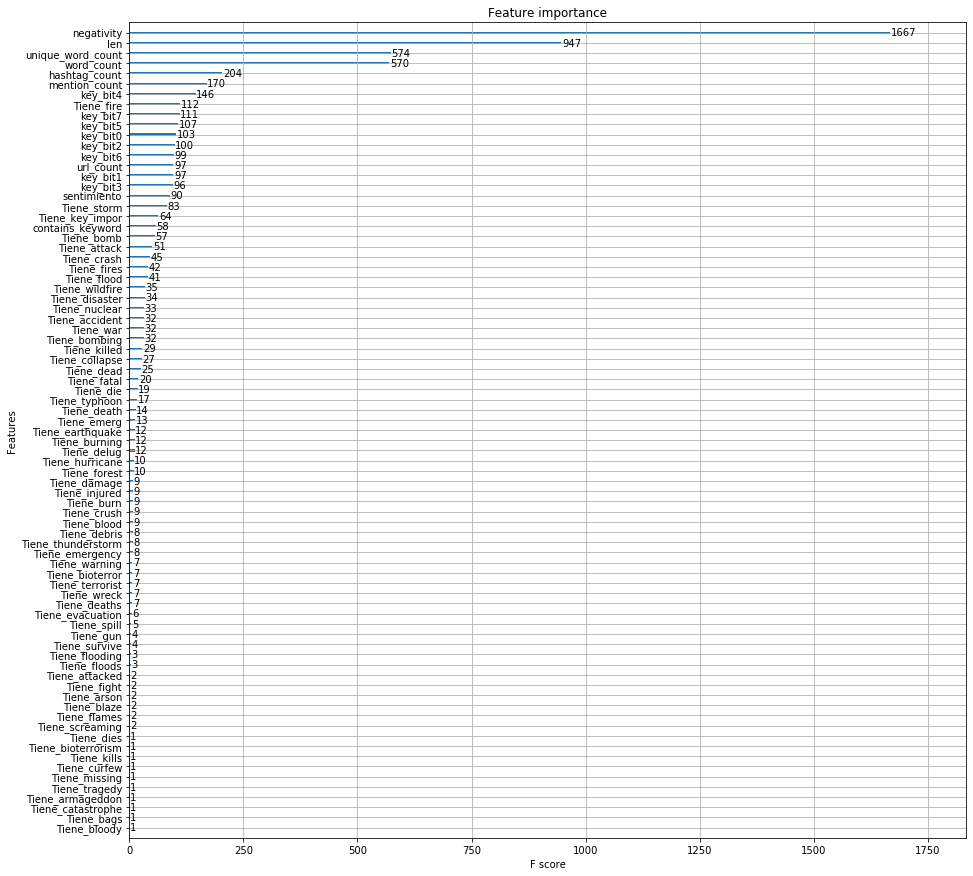

In [1234]:
import xgboost as xgb
plt.rcParams["figure.figsize"] = [15, 15]
xgb.plot_importance(model)

### TUNNING

In [1590]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

param_test = {
   # 'n_estimators':range(100, 1000, 25),   
    'learning_rate':(0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01),
   # 'subsample':[0.7,1],
   # 'gamma':[1,2,3,4,5,6,7,8,9,10],
    'colsample_bytree':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09],
   # 'max_depth':range(5,31,5)
  #  'min_child_weight' : range(1,10,1) 
}

search = GridSearchCV(
        estimator = XGBClassifier(n_estimators=700,n_jobs=6,objective="binary:logistic",
                     max_depth= 50,min_child_weight = 1, gamma=2.2,subsample= 0.42),
        param_grid = param_test,
        n_jobs=4,
        cv=5,
        verbose=10)


In [1591]:
search.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   14.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   24.8s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   36.4s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   49.4s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  5.7min
[Parallel(

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.08, gamma=2.2,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=50, min_child_weight=1,
                                     missing=None, n_estimators=700, n_jobs=6,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.42, verbosity=1),
             iid='warn', n_jobs=4,
             param_grid={'colsample_bytree': [0.01, 0.02, 0.03, 0.04, 0.05,
                                              0.06, 0.07, 0.08, 0.09],
             

In [1592]:
search.best_params_, search.best_score_

({'colsample_bytree': 0.09, 'learning_rate': 0.01}, 0.9676518883415435)

In [1593]:
model = search.best_estimator_

In [1594]:
evaluate(model, x_train,y_train, x_test, y_test)

Entrenamiento: 97.4056%
Testeo: 96.5857%.
F1 Score:  0.9658568614576494
F1 Score default:  0.9589905362776023


In [1595]:
best_predict = model.predict( to_predict )

In [1596]:
comprobar(best_predict)

F1 Score:  0.7854734906527735
F1 Score default:  0.717969379532635


In [1597]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

param_test = {
    'n_estimators':range(400, 1000, 10),   
    #'learning_rate':(0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01),
   # 'subsample':[0.7,1],
   # 'gamma':[1,2,3,4,5,6,7,8,9,10],
   # 'colsample_bytree':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09],
   # 'max_depth':range(5,31,5)
  #  'min_child_weight' : range(1,10,1) 
}

search = GridSearchCV(
        estimator = XGBClassifier(n_jobs=6,objective="binary:logistic",
                     max_depth= 50,min_child_weight = 1, gamma=2.2,subsample= 0.42,
                        colsample_bytree = 0.09, learning_rate = 0.01),
        param_grid = param_test,
        n_jobs=4,
        cv=5,
        verbose=10)

In [1598]:
search.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   19.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   33.4s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   44.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  6.4min
[Parallel(

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.09, gamma=2.2,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=50, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=6,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.42, verbosity=1),
             iid='warn', n_jobs=4,
             param_grid={'n_estimators': range(400, 1000, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [1619]:
search.best_params_, search.best_score_,search.best_index_

({'n_estimators': 950}, 0.9692939244663382, 55)

In [1600]:
model = search.best_estimator_

In [1601]:
evaluate(model, x_train,y_train, x_test, y_test)

Entrenamiento: 97.5041%
Testeo: 96.6513%.
F1 Score:  0.9665134602757715
F1 Score default:  0.9598741148701809


In [1602]:
best_predict = model.predict( to_predict )

In [1603]:
comprobar(best_predict)

F1 Score:  0.7833282255593012
F1 Score default:  0.7195557318524395


### Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

param_test = {
   # 'n_estimators':range(100, 501, 100),   
    'learning_rate':(0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1),
   # 'subsample':[0.7,1],
   # 'gamma':[1,15,30],
   # 'colsample_bytree':[0.5,1.0],
   # 'max_depth':range(1,42,10)
   # 'min_child_weight' : range(1,10,1)  
}

search = GridSearchCV(
        estimator = XGBClassifier(n_estimators = 250,max_depth=40, min_child_weight=3,objective="binary:logistic",colsample_bytree=0.5, gamma=1, subsample=1),
        param_grid = param_test,
        n_jobs=4,
        cv=5,
        verbose=10)

In [ ]:
search.fit(x_train,y_train)

In [ ]:
search.best_params_, search.best_score_

In [ ]:
model = search.best_estimator_

### Testeo

In [ ]:
evaluate(model, x_train,y_train, x_test, y_test)

### Predigo

In [ ]:
best_predict = model.predict( to_predict )

In [ ]:
comprobar(best_predict)

### Importance

In [ ]:
import xgboost as xgb
plt.rcParams["figure.figsize"] = [20, 35]
xgb.plot_importance(model)

### Guardo Submission

In [102]:
result = submission_output(ids, best_predict,"XGB v4.1.csv")
result

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1
